In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates
from pywaffle import Waffle

In [2]:
df = pd.read_csv('dataset_space_API_past_launches_raw.csv')

# Missing Values
PayloadMass_mean = df['PayloadMass'].mean()
PayloadMass_mean = round(PayloadMass_mean, 1)
df['PayloadMass'] = df['PayloadMass'].fillna(PayloadMass_mean)
df['LandingPad'] = df['LandingPad'].fillna('missing')
df['Block'] = df['Block'].fillna('0')

# Encode Outcome Column
df = df.replace({'Outcome': {'True Ocean': 1, 
                             'True RTLS': 1,
                             'True ASDS': 1,
                             'False Ocean':0,
                             'False RTLS':0,
                             'False ASDS':0,
                             'None ASDS':0,
                             'None None':0,},
                 'GridFins': {True: 1, False: 0},
                 'Reused': {True: 1, False: 0},
                 'Legs': {True: 1, False: 0}
                })

In [3]:
# set the default size
plt.rcParams['figure.figsize'] = (20,10)
plt.rcParams.update({'font.size': 16})

# Waffle chart of Outcome

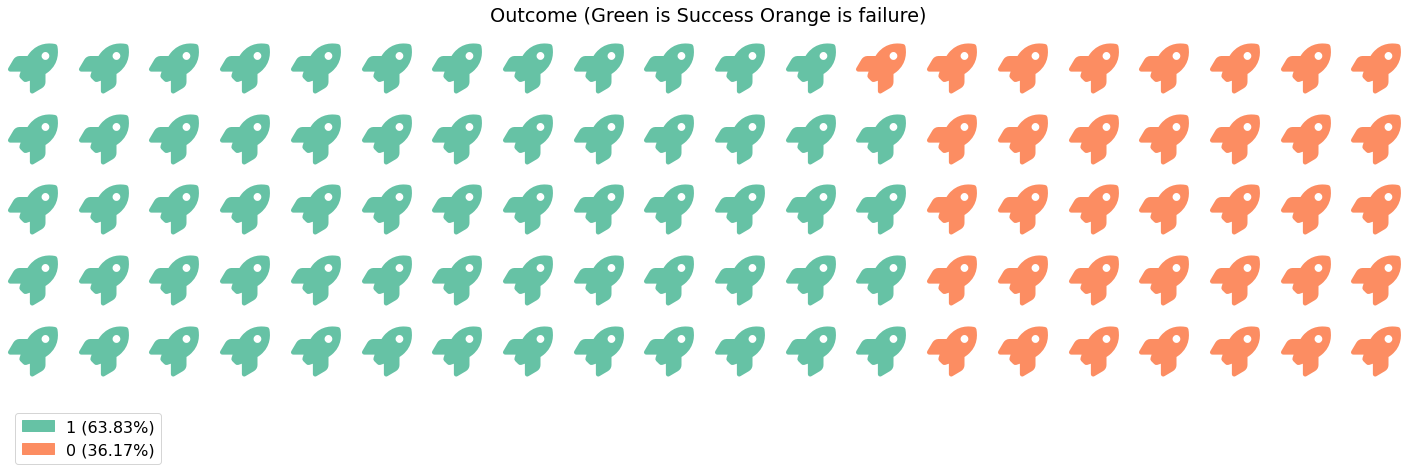

In [4]:
outcome_data = dict(df['Outcome'].value_counts(normalize = True) * 100)

fig = plt.figure(
    columns = 20, 
    FigureClass = Waffle, 
    values = outcome_data,
    icons = 'rocket',
    icon_size = 50,
    labels = [f"{s} ({f:.2f}%)" for s, f in outcome_data.items()],
    legend = {'loc': 'lower left', 'bbox_to_anchor': (0, -0.3)}
)

plt.title('Outcome (Green is Success Orange is failure)')
plt.show()

# Bar chart of LaunchSite

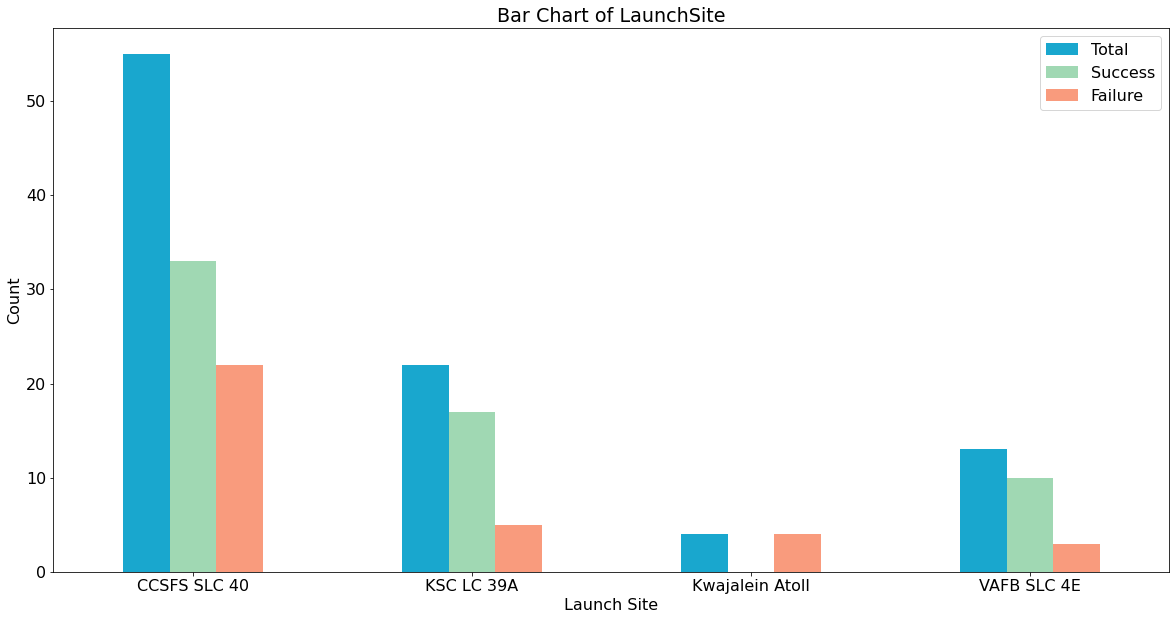

In [16]:
counts = df.groupby('LaunchSite')['Outcome'].agg(['count', 'sum'])
counts['failure_count'] = counts['count'] - counts['sum']

colors = ['#19A7CE', '#A0D8B3', '#F99B7D']
counts.plot(kind='bar', rot=0, color=colors)

plt.title('Bar Chart of LaunchSite')
plt.xlabel('Launch Site')
plt.ylabel('Count')
plt.legend(['Total', 'Success', 'Failure'])

plt.show()

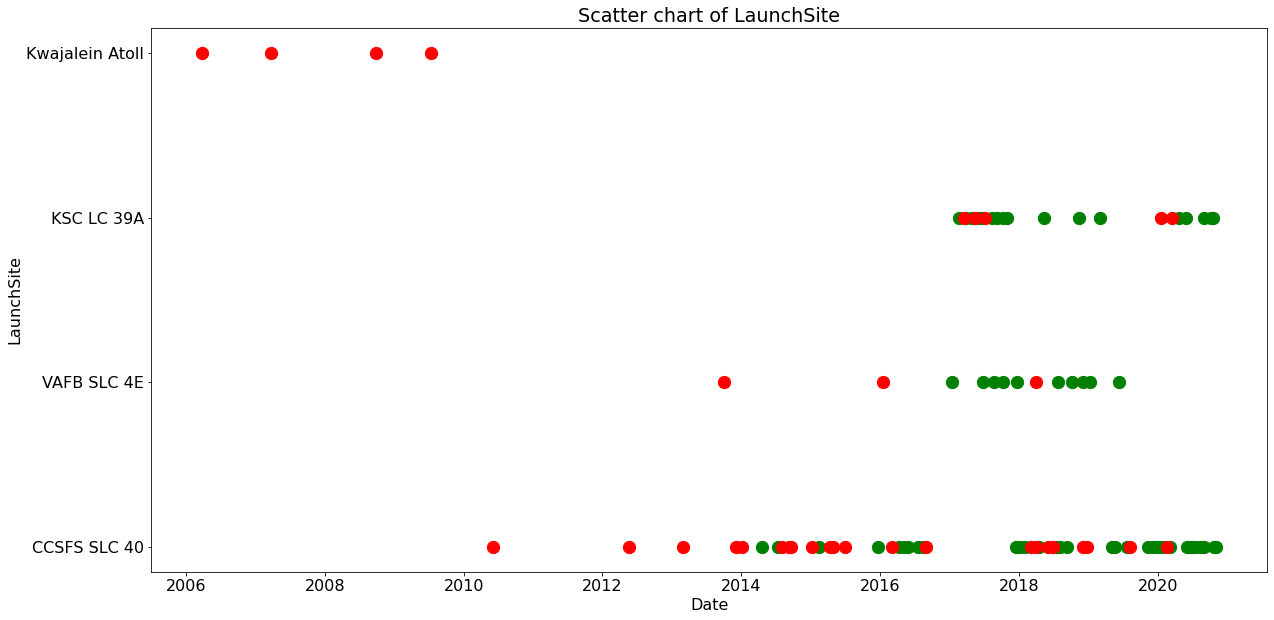

In [17]:
success = df[df['Outcome'] == 1]
failure = df[df['Outcome'] == 0]

success.loc[:, 'Date'] = pd.to_datetime(success['Date'])
failure.loc[:, 'Date'] = pd.to_datetime(failure['Date'])

# scatter chart, green is success, red is failure.
fig, ax = plt.subplots()
ax.scatter(success['Date'], success['LaunchSite'], s = 150, c = 'green', label = 'Success')
ax.scatter(failure['Date'], failure['LaunchSite'], s = 150, c = 'red', label = 'Failure')

plt.title('Scatter chart of LaunchSite')
plt.xlabel('Date')
plt.ylabel('LaunchSite')

plt.show()

# Bar Chart of Orbit

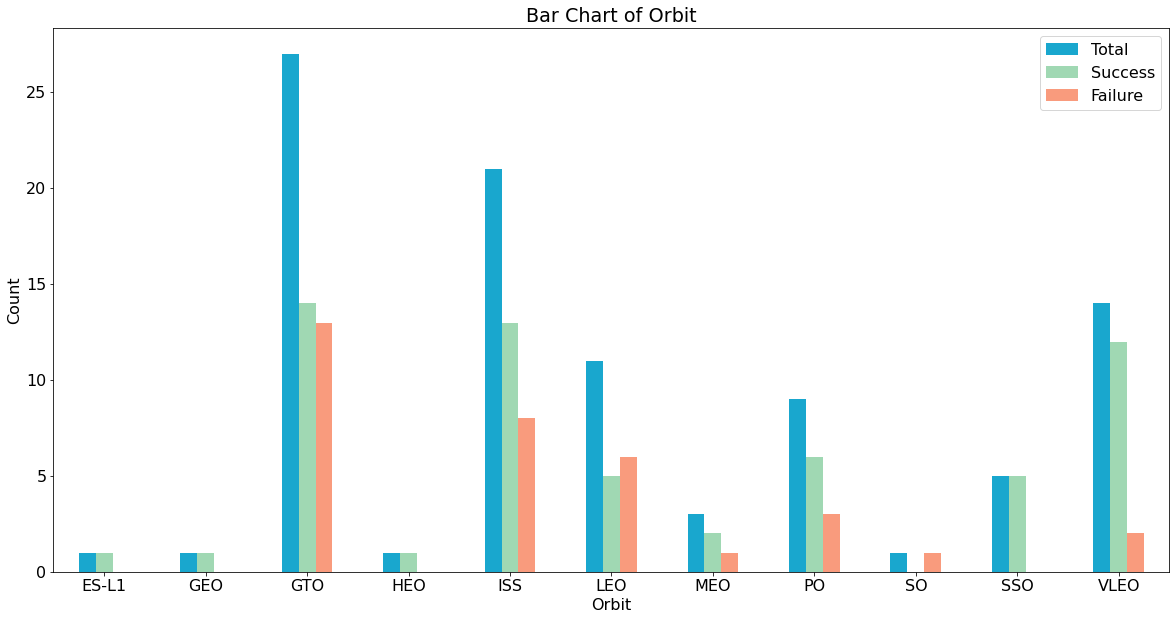

In [19]:
counts = df.groupby('Orbit')['Outcome'].agg(['count', 'sum'])
counts['failure_count'] = counts['count'] - counts['sum']

colors = ['#19A7CE', '#A0D8B3', '#F99B7D']
counts.plot(kind='bar', rot=0, color=colors)

plt.title('Bar Chart of Orbit')
plt.xlabel('Orbit')
plt.ylabel('Count')
plt.legend(['Total', 'Success', 'Failure'])

plt.show()

# Scatter Chart of Orbit

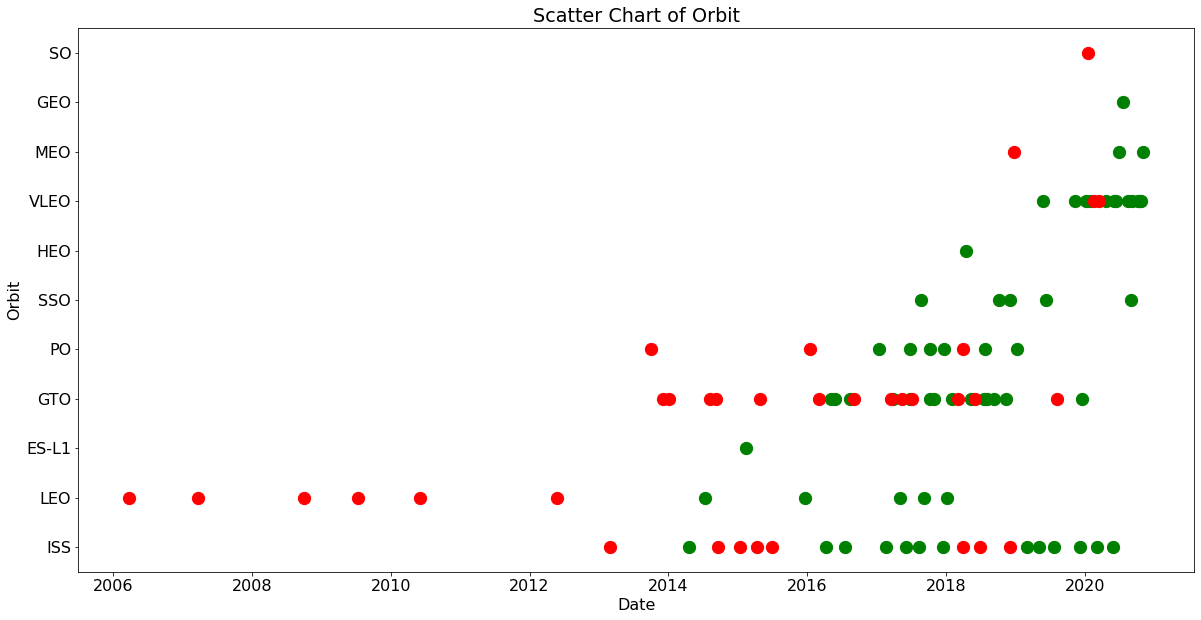

In [23]:
success = df[df['Outcome'] == 1]
failure = df[df['Outcome'] == 0]

success.loc[:, 'Date'] = pd.to_datetime(success['Date'])
failure.loc[:, 'Date'] = pd.to_datetime(failure['Date'])

# scatter chart, green is success, red is failure.
fig, ax = plt.subplots()
ax.scatter(success['Date'], success['Orbit'], s = 150, c = 'green', label = 'Success')
ax.scatter(failure['Date'], failure['Orbit'], s = 150, c = 'red', label = 'Failure')

plt.title('Scatter Chart of Orbit')
plt.xlabel('Date')
plt.ylabel('Orbit')

plt.show()

# Bar Chart of Flights

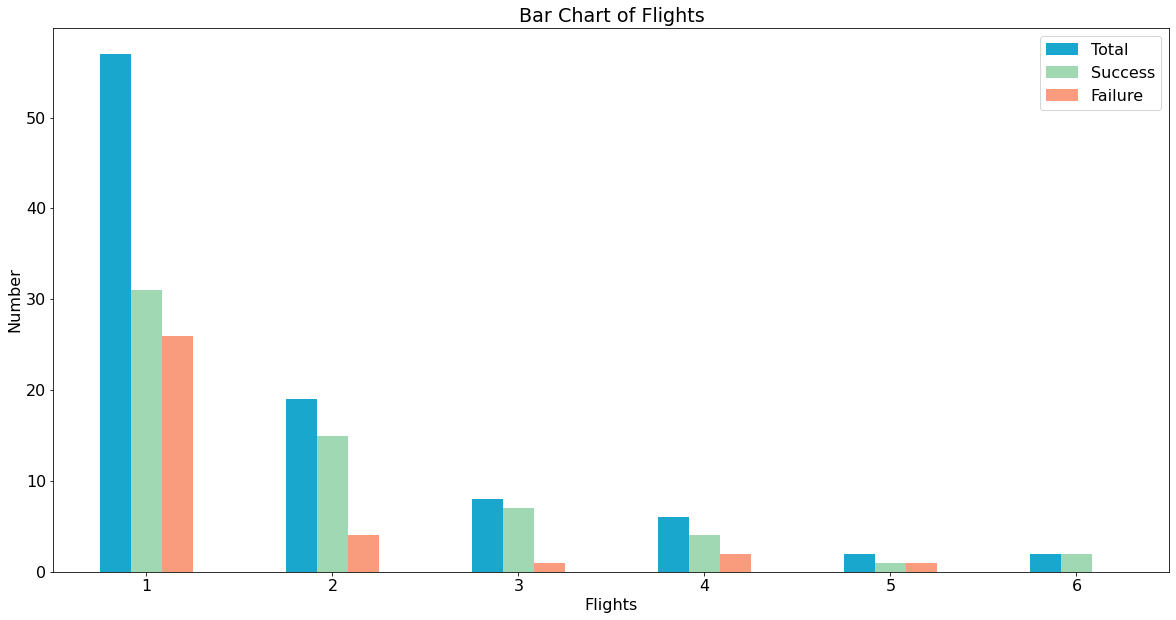

In [24]:
counts = df.groupby('Flights')['Outcome'].agg(['count', 'sum'])
counts['failure_count'] = counts['count'] - counts['sum']

colors = ['#19A7CE', '#A0D8B3', '#F99B7D']
counts.plot(kind='bar', rot=0, color=colors)

plt.title('Bar Chart of Flights')
plt.xlabel('Flights')
plt.ylabel('Number')
plt.legend(['Total', 'Success', 'Failure'])

plt.show()

# Scatter Chart of Flights

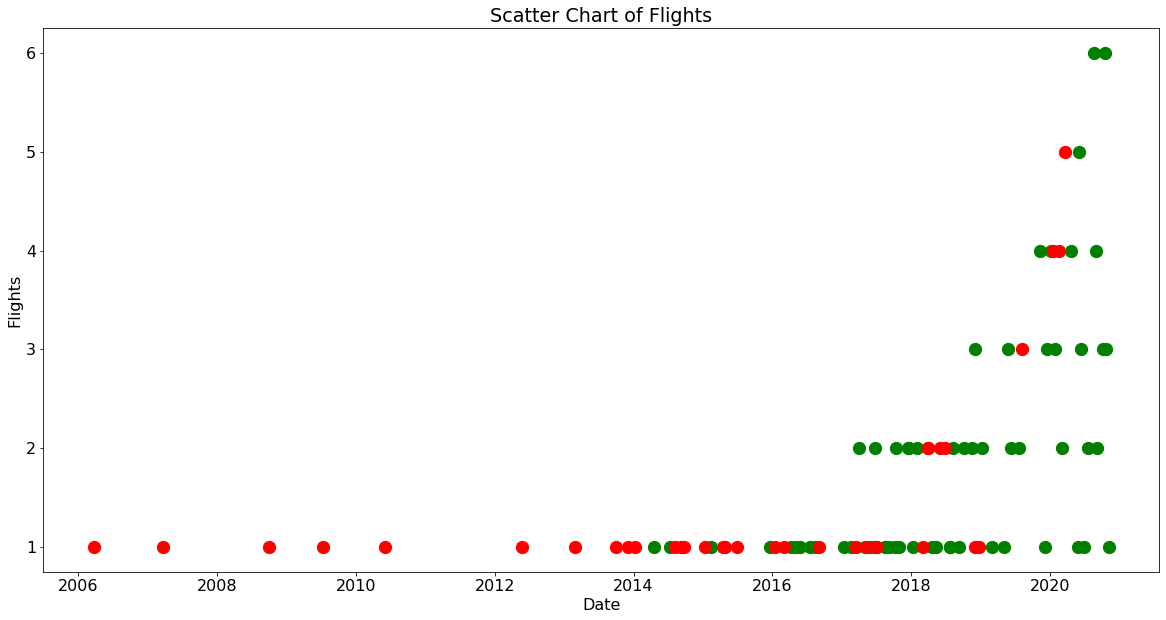

In [25]:
success = df[df['Outcome'] == 1]
failure = df[df['Outcome'] == 0]

success.loc[:, 'Date'] = pd.to_datetime(success['Date'])
failure.loc[:, 'Date'] = pd.to_datetime(failure['Date'])

# scatter chart, green is success, red is failure.
fig, ax = plt.subplots()
ax.scatter(success['Date'], success['Flights'], s = 150, c = 'green', label = 'Success')
ax.scatter(failure['Date'], failure['Flights'], s = 150, c = 'red', label = 'Failure')

plt.title('Scatter Chart of Flights')
plt.xlabel('Date')
plt.ylabel('Flights')

plt.show()

# Bar Chart of LandingPad

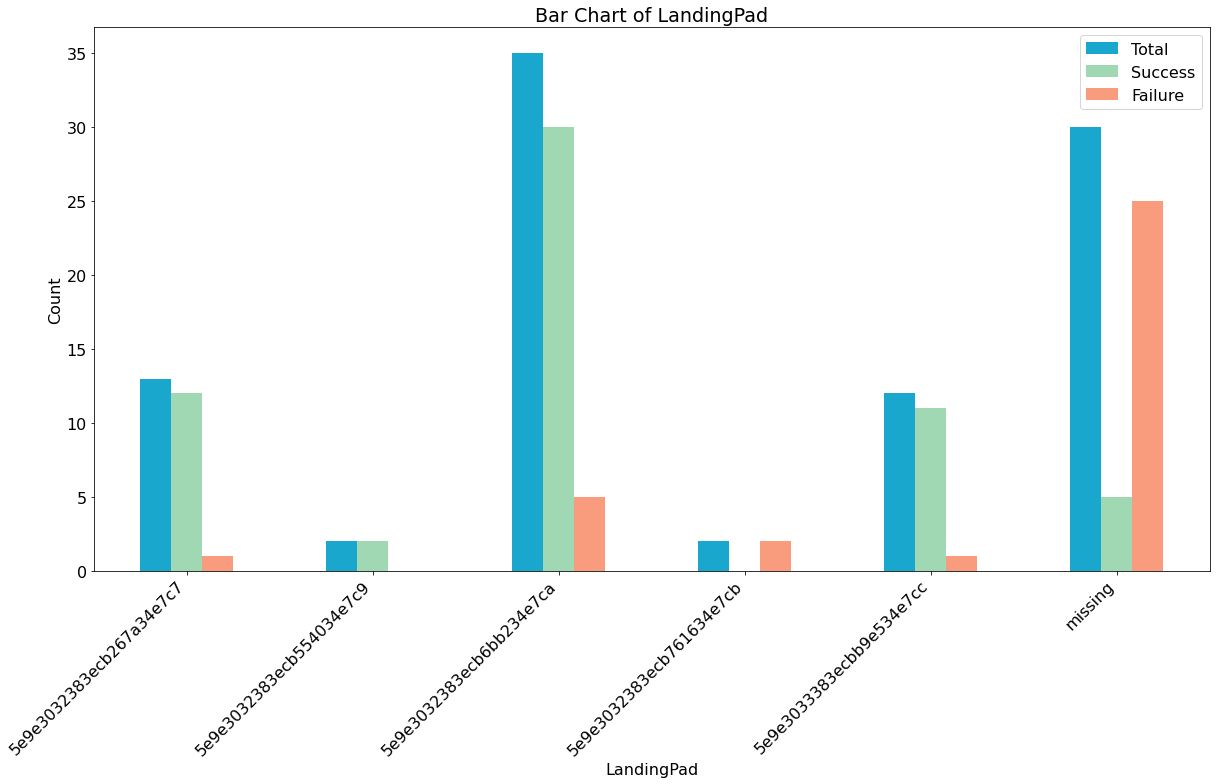

In [26]:
counts = df.groupby('LandingPad')['Outcome'].agg(['count', 'sum'])
counts['failure_count'] = counts['count'] - counts['sum']

colors = ['#19A7CE', '#A0D8B3', '#F99B7D']
counts.plot(kind='bar', rot=0, color=colors)

plt.title('Bar Chart of LandingPad')
plt.xlabel('LandingPad')
plt.ylabel('Count')
plt.legend(['Total', 'Success', 'Failure'])
plt.xticks(rotation=45, ha='right')

plt.show()

# Bar Chart of Block

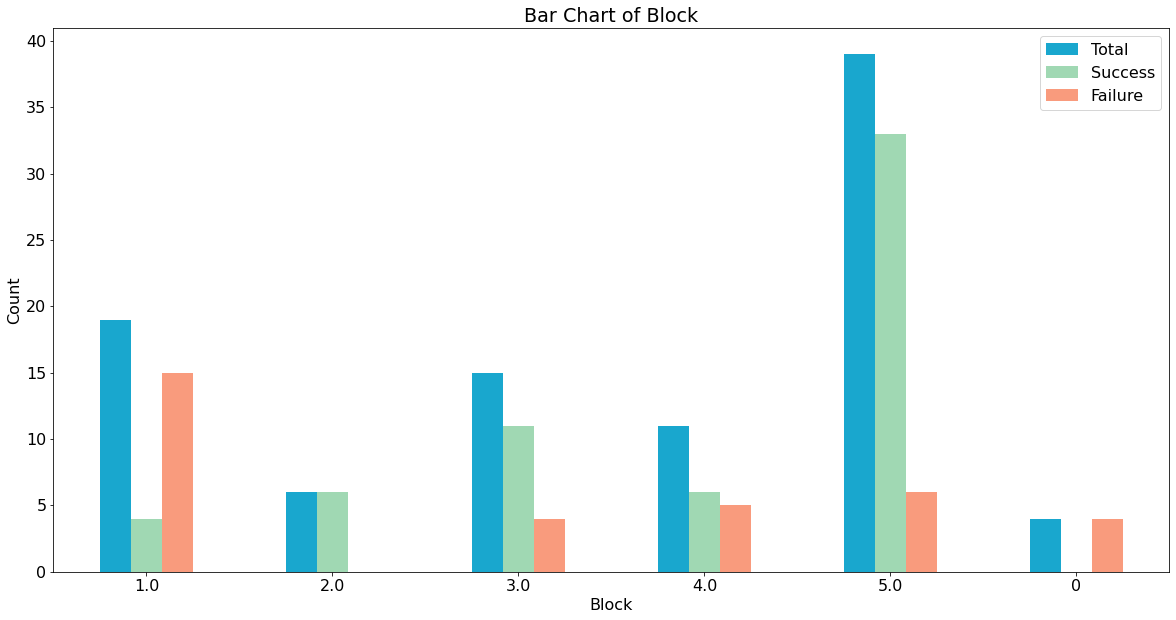

In [29]:
counts = df.groupby('Block')['Outcome'].agg(['count', 'sum'])
counts['failure_count'] = counts['count'] - counts['sum']

colors = ['#19A7CE', '#A0D8B3', '#F99B7D']
counts.plot(kind='bar', rot=0, color=colors)

plt.title('Bar Chart of Block')
plt.xlabel('Block')
plt.ylabel('Count')
plt.legend(['Total', 'Success', 'Failure'])

plt.show()

# Bar Chart of ReusedCount

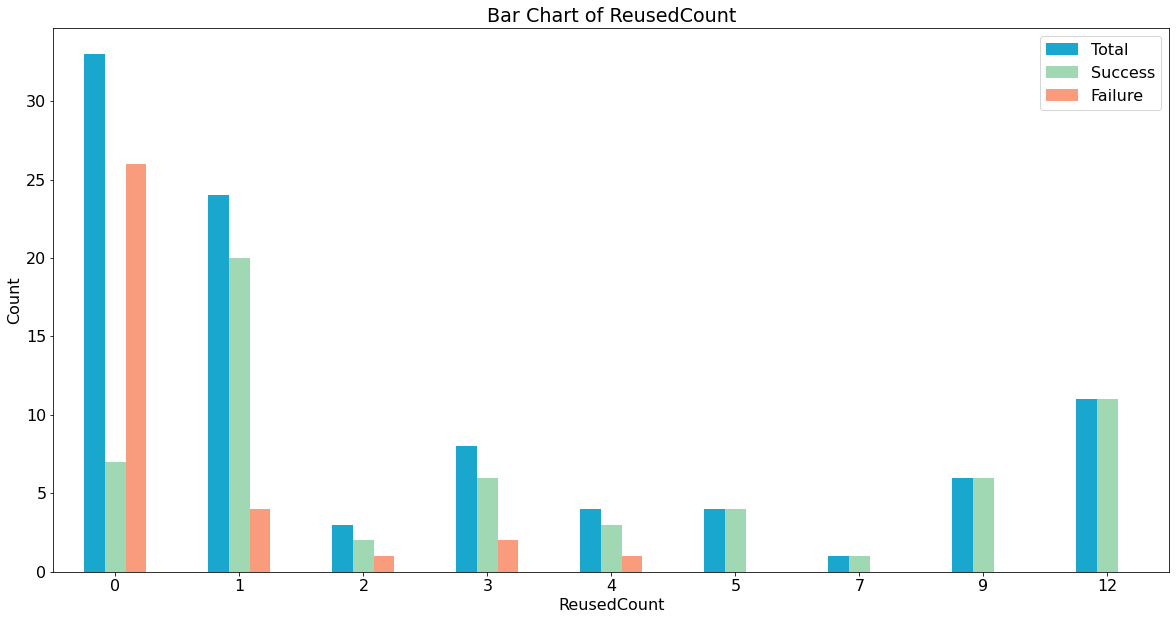

In [28]:
counts = df.groupby('ReusedCount')['Outcome'].agg(['count', 'sum'])
counts['failure_count'] = counts['count'] - counts['sum']

colors = ['#19A7CE', '#A0D8B3', '#F99B7D']
counts.plot(kind='bar', rot=0, color=colors)

plt.title('Bar Chart of ReusedCount')
plt.xlabel('ReusedCount')
plt.ylabel('Count')
plt.legend(['Total', 'Success', 'Failure'])

plt.show()

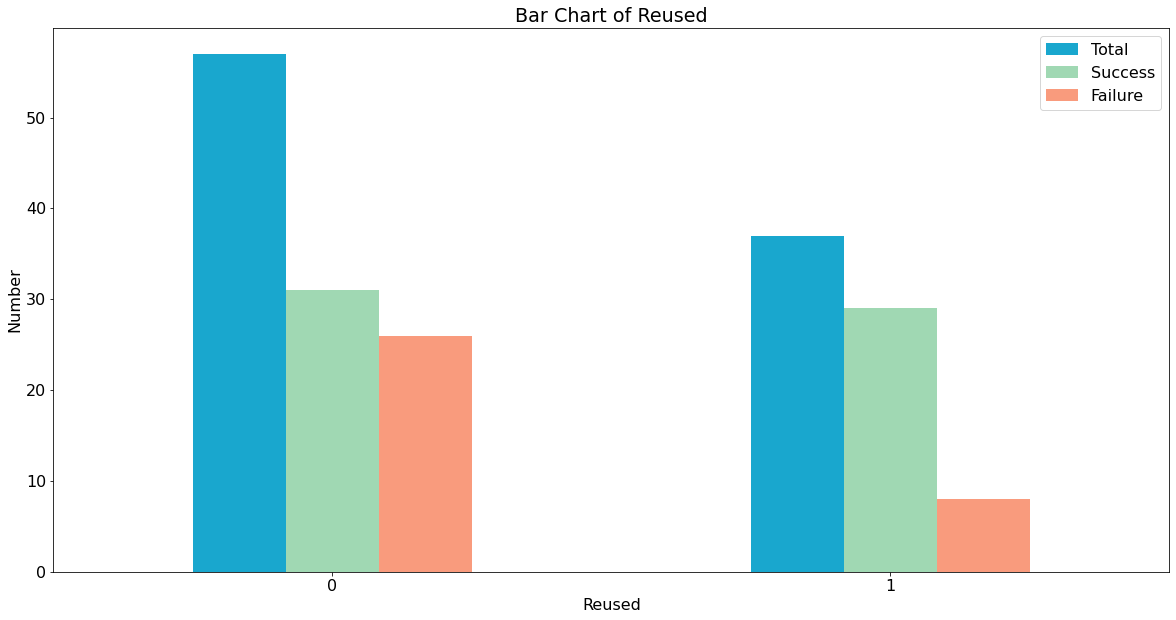

In [15]:
counts = df.groupby('Reused')['Outcome'].agg(['count', 'sum'])
counts['failure_count'] = counts['count'] - counts['sum']

colors = ['#19A7CE', '#A0D8B3', '#F99B7D']
counts.plot(kind='bar', rot=0, color=colors)

plt.title('Bar Chart of Reused')
plt.xlabel('Reused')
plt.ylabel('Number')
plt.legend(['Total', 'Success', 'Failure'])

plt.show()